In [3]:
import numpy as np
import math
from matplotlib import pyplot as plt
from functools import partial

In [48]:
def schedule(time, mu, gamma, coefficient):
    linear = time
    time = time - mu
    time = gamma * (time ** 2)
    time = np.exp(-time)
    time = (time * coefficient)
    time = np.sin(linear * (math.pi)) * time
    time = time + linear
    return time

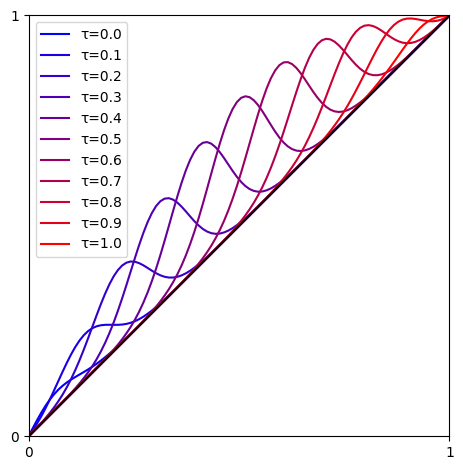

In [77]:
from matplotlib.colors import Colormap


for mu in np.linspace(0, 1, 11):
    _schedule = partial(schedule, mu=mu, gamma=100.0, coefficient=0.3)
    plt.plot(
        np.linspace(0, 1, 100),
        _schedule(np.linspace(0, 1, 100)),
        c=(mu, 0, 1 - mu),
        label=f"τ={mu:.1f}"
    )
    
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), c='black')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks([0, 1])
plt.yticks([0, 1])

plt.legend()
# make square
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.savefig("schedule.png")